In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [81]:
df=pd.read_csv('data.csv')

In [82]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\aaa\.cache\kagglehub\datasets\brendan45774\test-file\versions\6


In [84]:
df.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [85]:
df.shape

(418, 12)

In [86]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [88]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [89]:
df1 = df[['Age', 'Cabin','Fare']]


In [90]:
df1.head(5)

,Age,Cabin,Fare
0,34.5,NaN,7.8292
1,47.0,NaN,7.0000
2,62.0,NaN,9.6875
3,27.0,NaN,8.6625
4,22.0,NaN,12.2875


In [91]:
df1.describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


In [92]:
df1['Cabin'].value_counts()


Cabin
B57 B59 B63 B66    3
B45                2
C23 C25 C27        2
C78                2
C31                2
                  ..
B41                1
C7                 1
D40                1
D38                1
C105               1
Name: count, Length: 76, dtype: int64

In [93]:
df1.drop('Cabin', axis=1, inplace=True)

C:\Users\aaa\AppData\Local\Temp\ipykernel_11964\2389003268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Cabin', axis=1, inplace=True)


In [94]:
df1.head(5)

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875


In [95]:
Age_mean=int(df1['Age'].mean())
Fare_mean=int(df1['Fare'].mean())

In [96]:
dfmean

30

In [97]:
df1['Age'].fillna(Age_mean, inplace=True)
df1['Fare'].fillna(Fare_mean, inplace=True)

C:\Users\aaa\AppData\Local\Temp\ipykernel_11964\1563186606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(Age_mean, inplace=True)
C:\Users\aaa\AppData\Local\Temp\ipykernel_11964\1563186606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'].fillna(Age_mean, inplace=True)
C:\Users\aaa\AppData\Local\Temp\ipykern

In [98]:
df1.isnull().sum()

Age     0
Fare    0
dtype: int64

In [99]:
df[['Age','Fare']]=df1[['Age','Fare']]

In [100]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [101]:
df=df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [103]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


In [104]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].replace({'Q': 0, 'S': 1, 'C':2})

C:\Users\aaa\AppData\Local\Temp\ipykernel_11964\4231833435.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
C:\Users\aaa\AppData\Local\Temp\ipykernel_11964\4231833435.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked'] = df['Embarked'].replace({'Q': 0, 'S': 1, 'C':2})


In [105]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


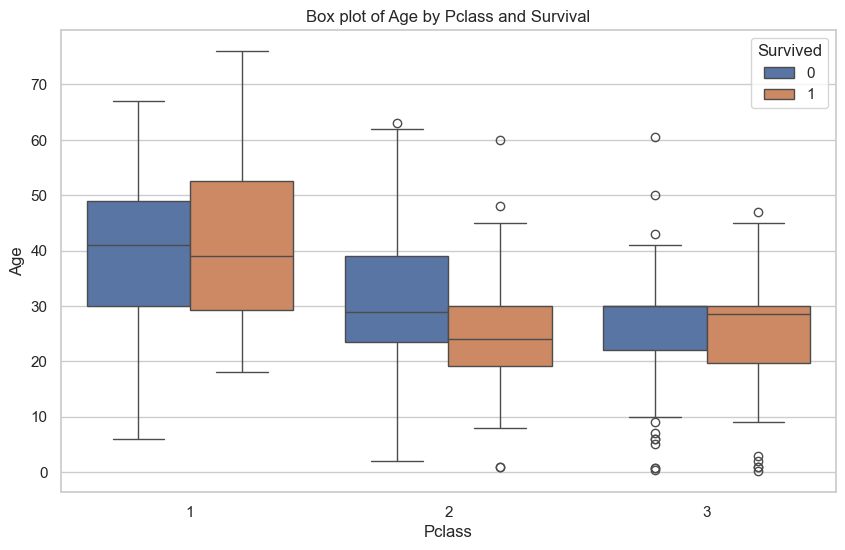

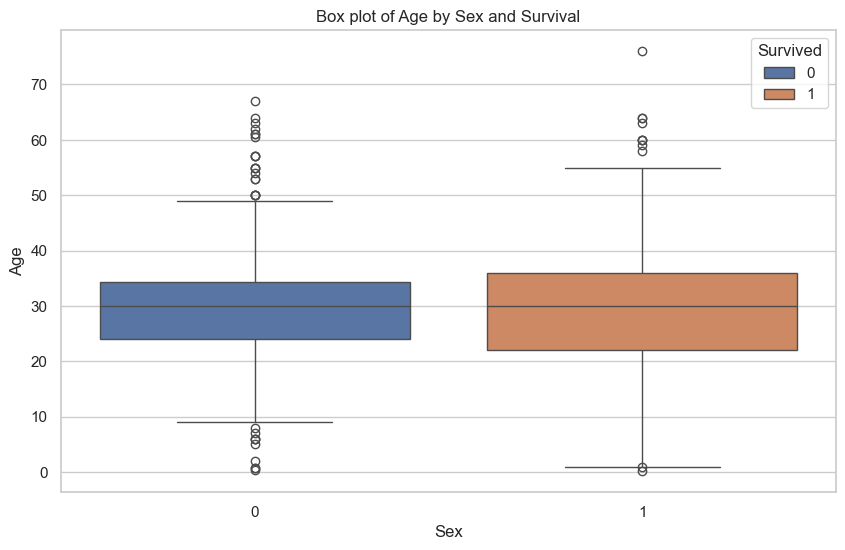

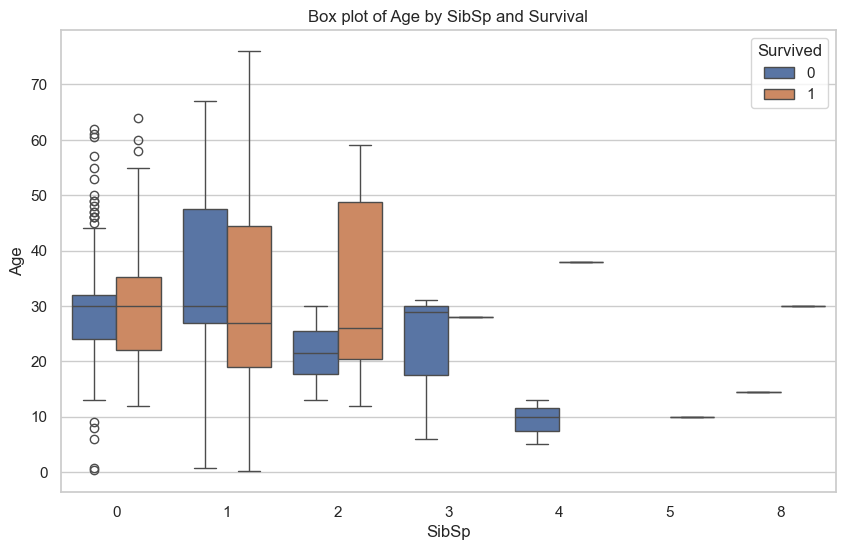

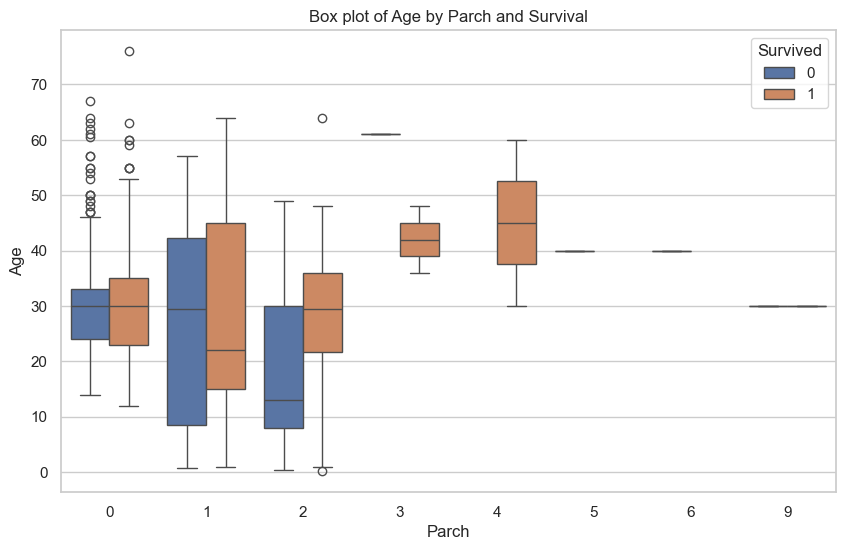

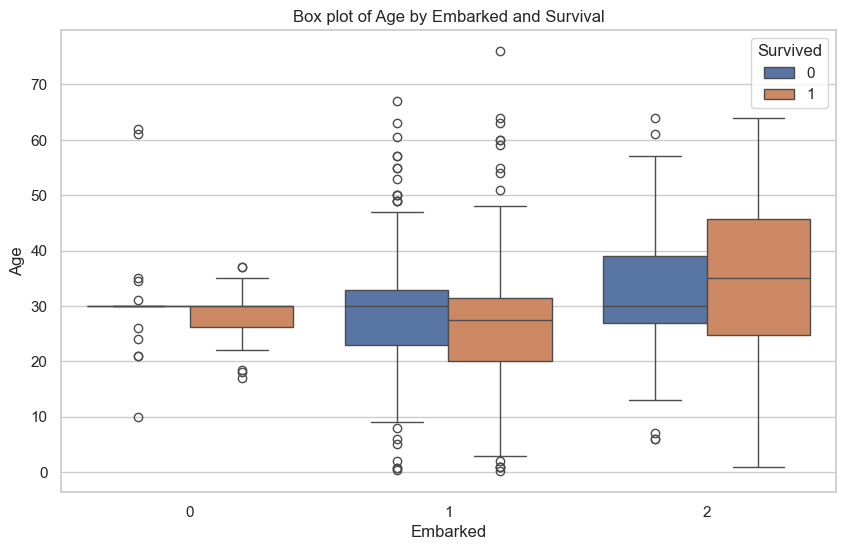

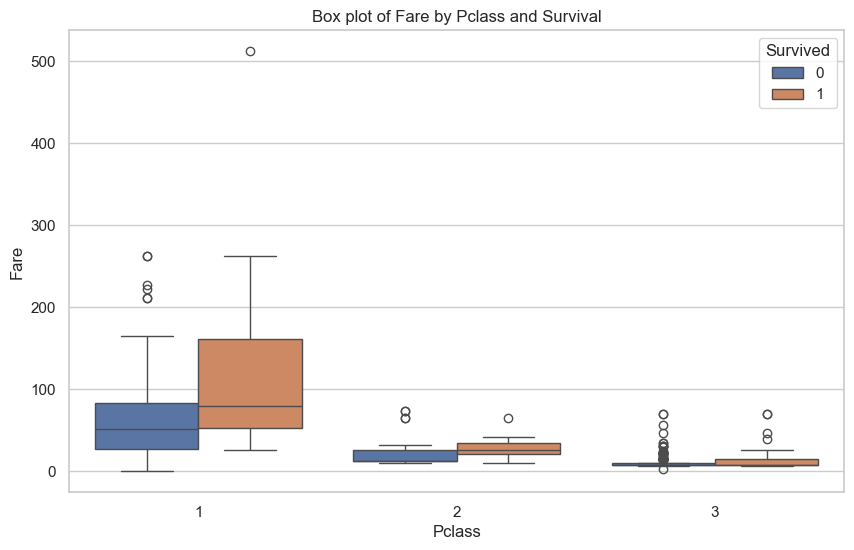

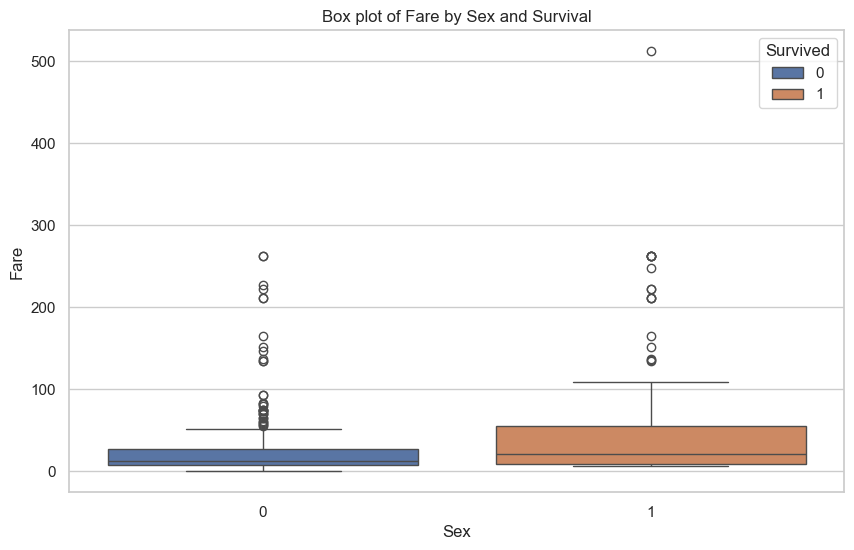

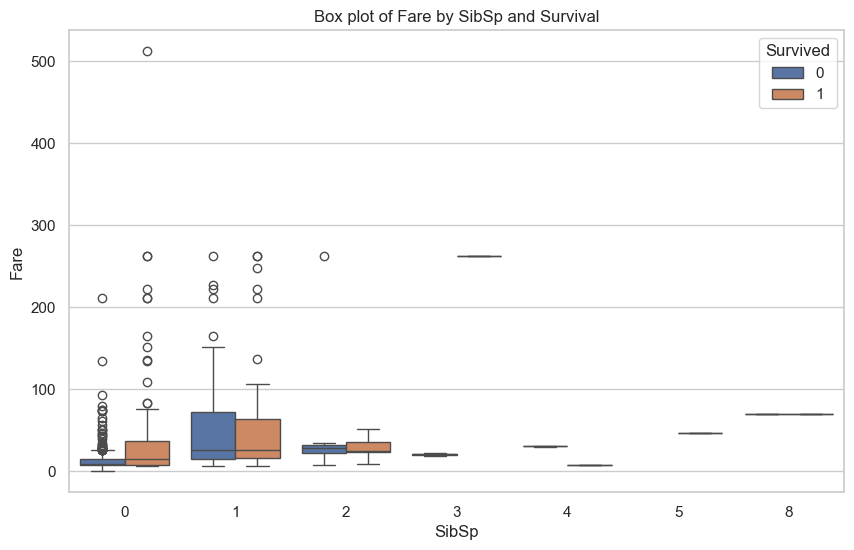

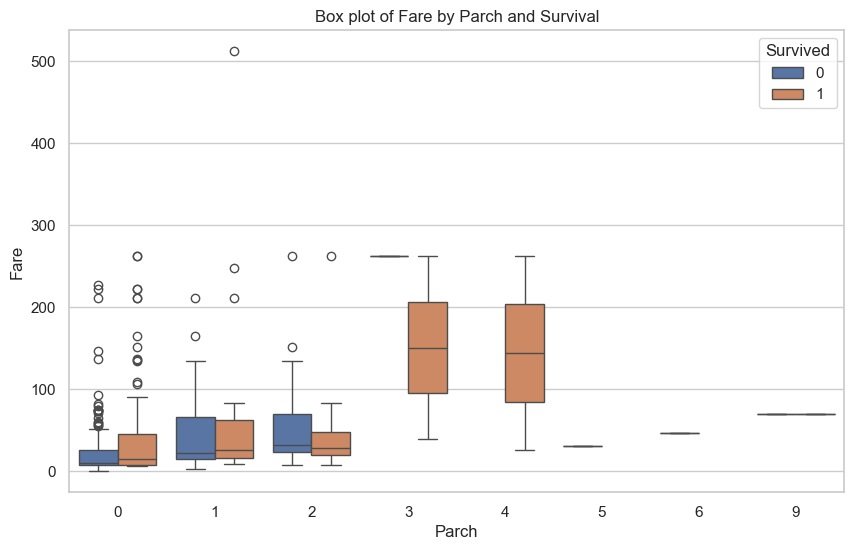

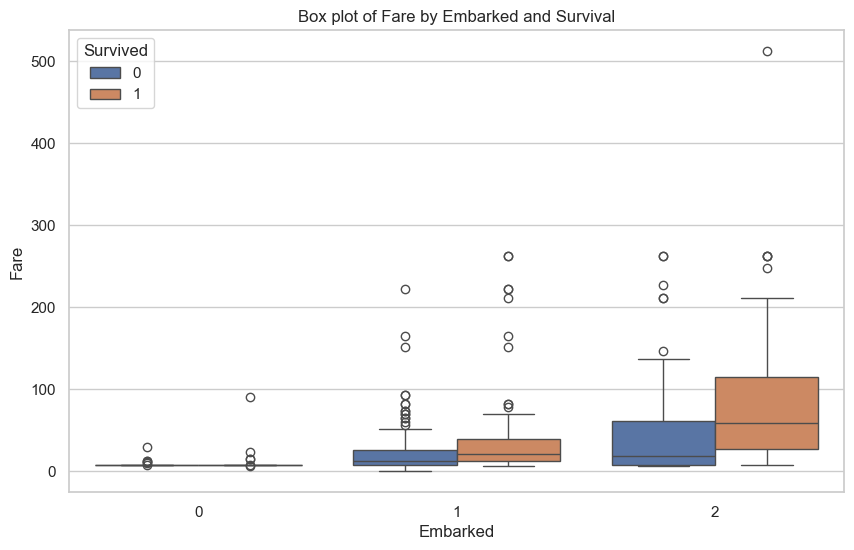

In [106]:
categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numerical_columns = ['Age', 'Fare']
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, hue='Survived', data=df)
        plt.title(f'Box plot of {num_col} by {cat_col} and Survival')
        plt.show()

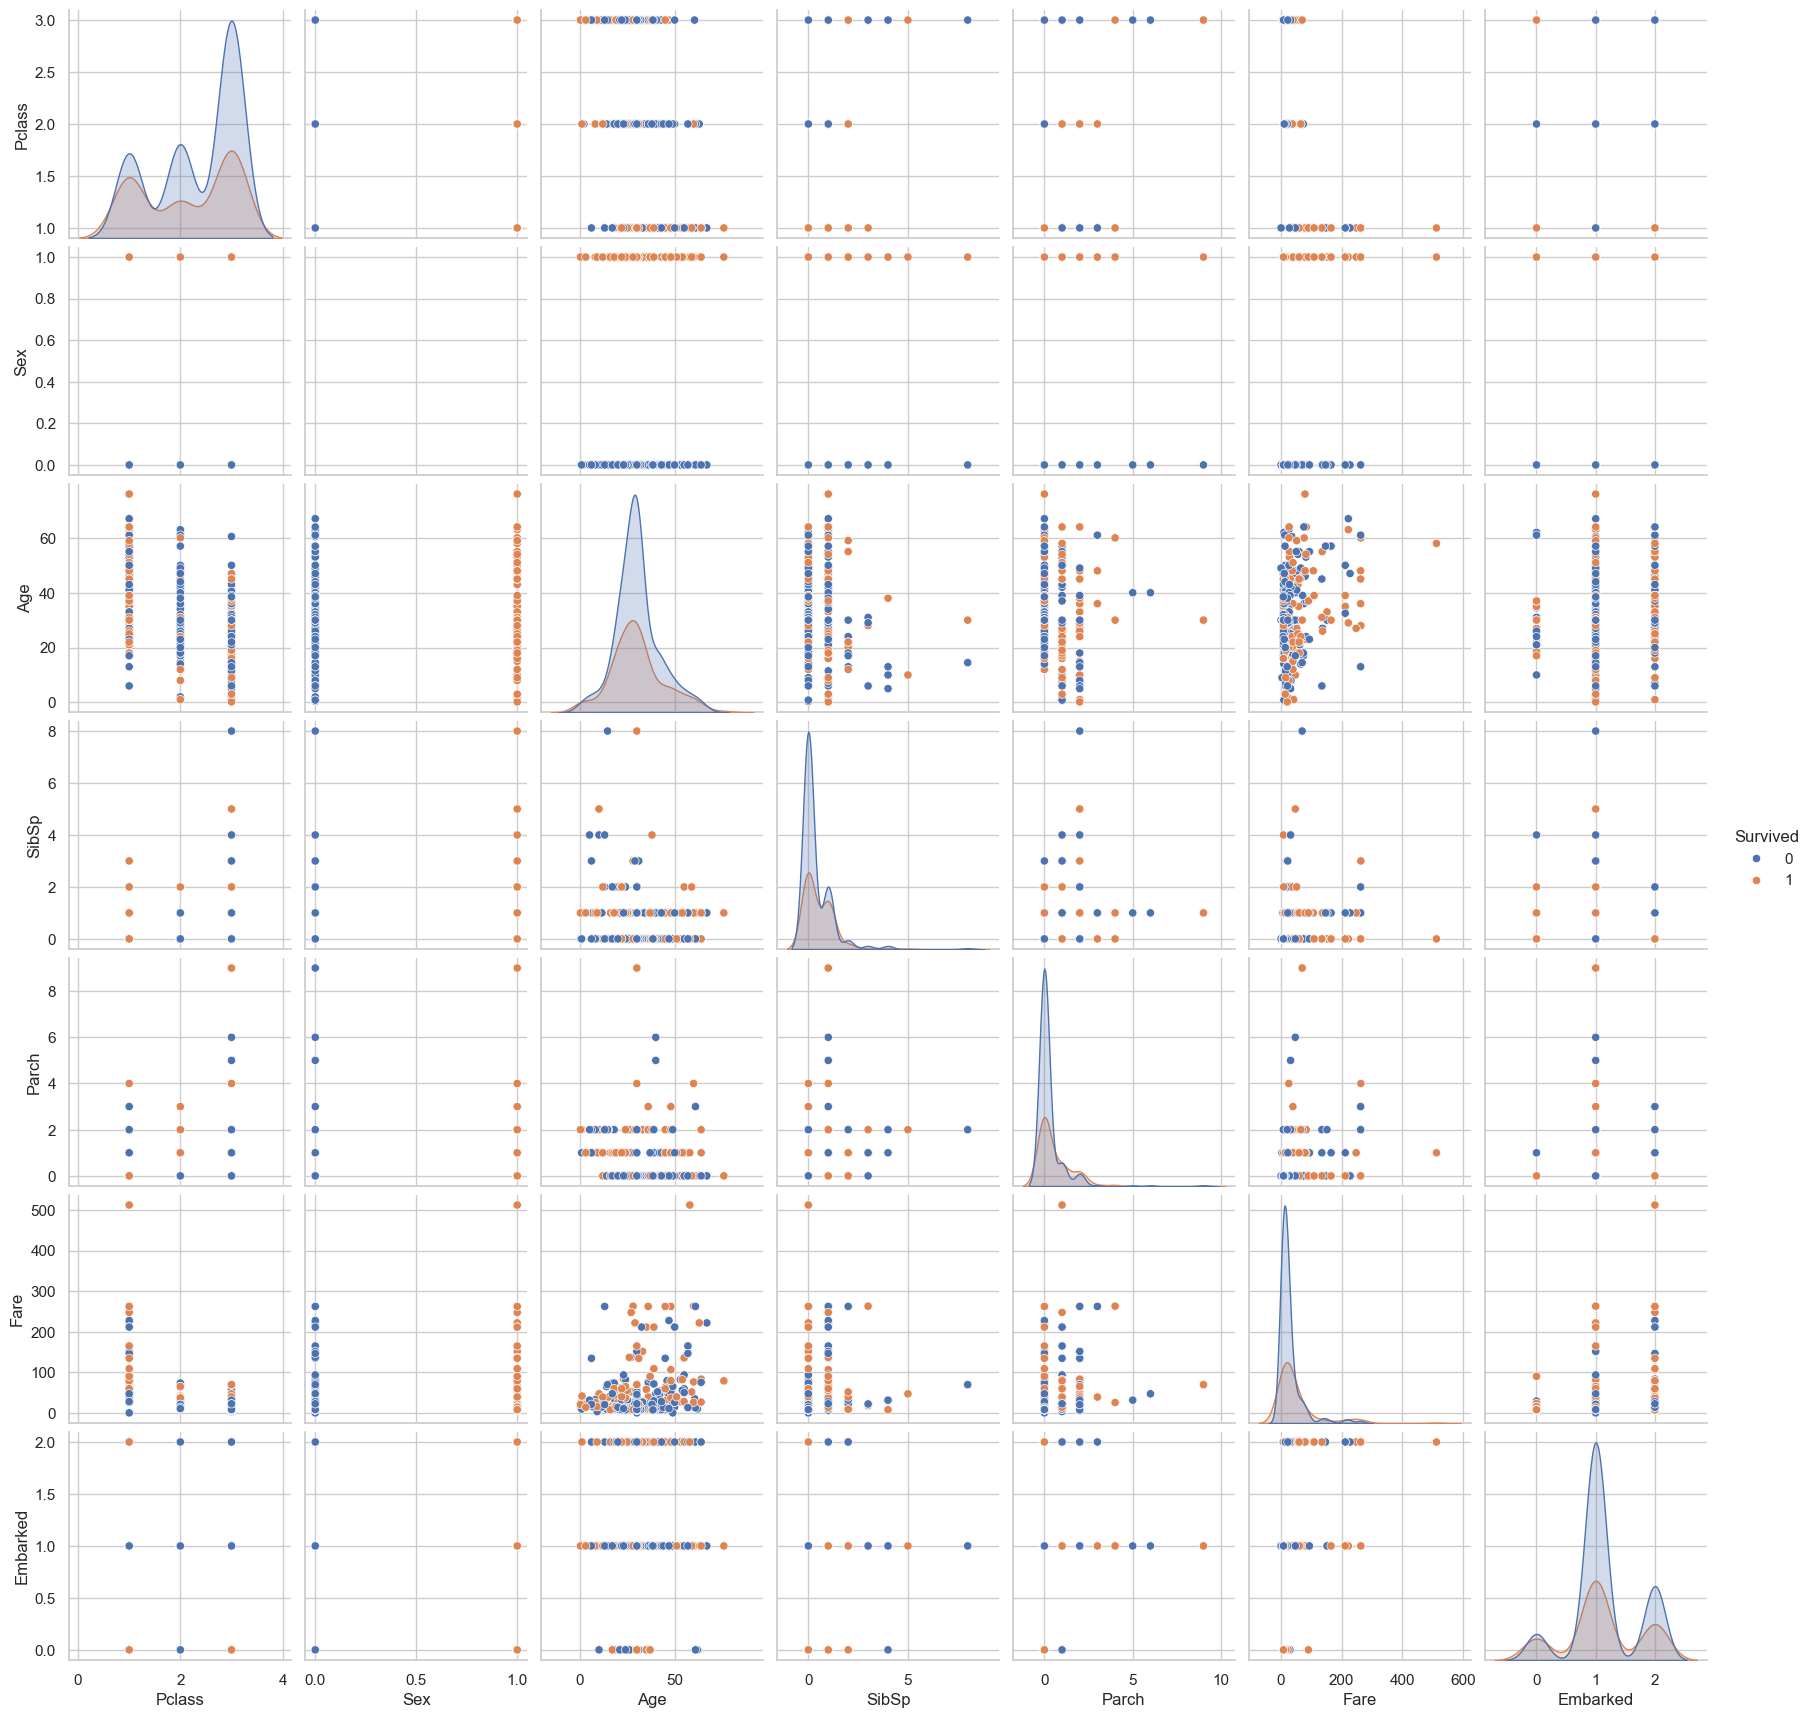

In [107]:

sns.set(style="whitegrid")

sns.pairplot(df, hue='Survived')
plt.show()




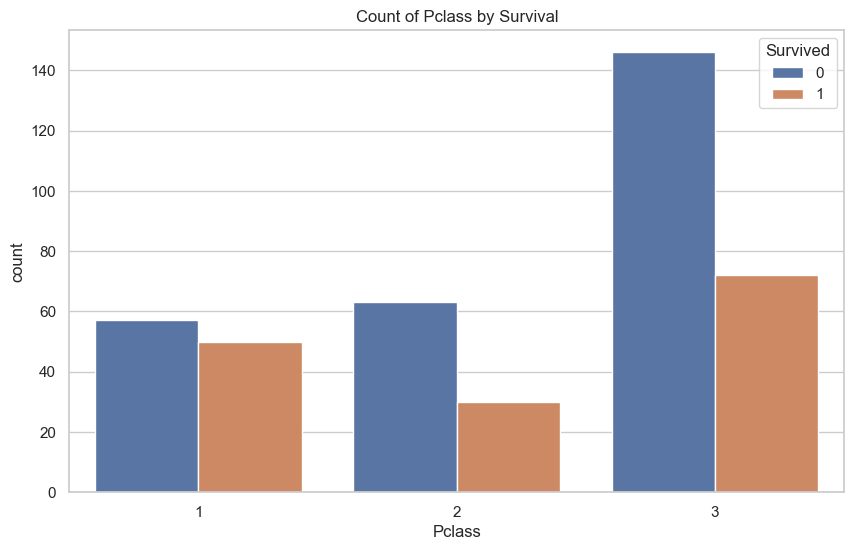

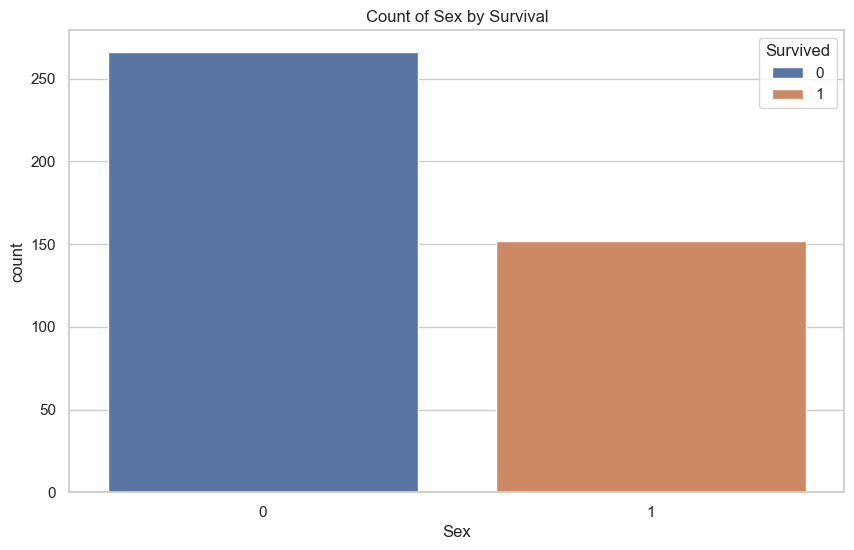

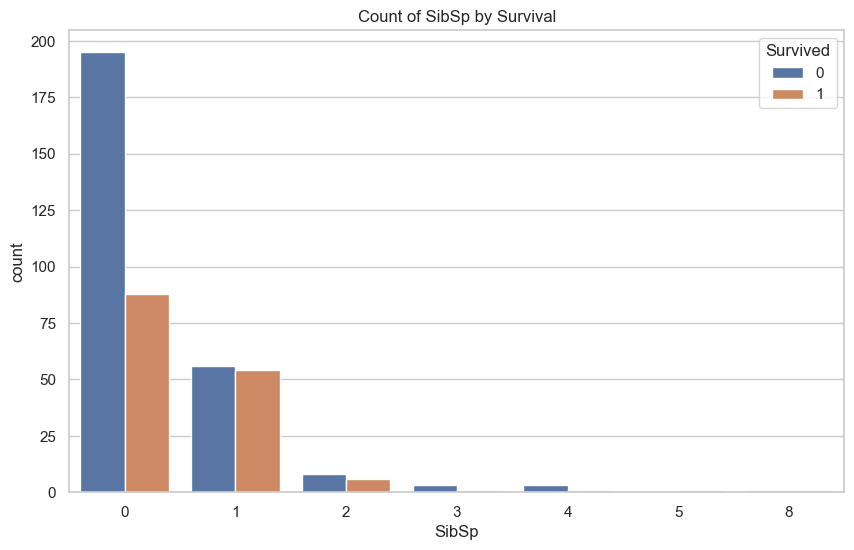

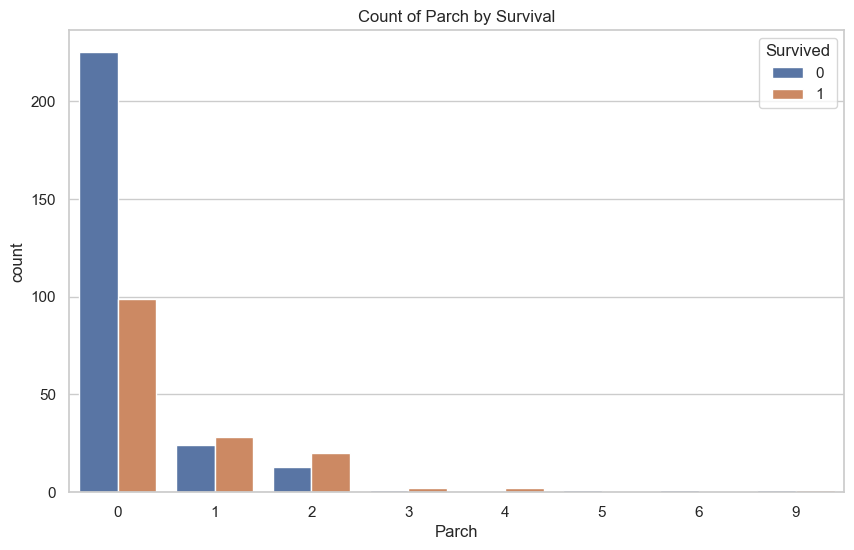

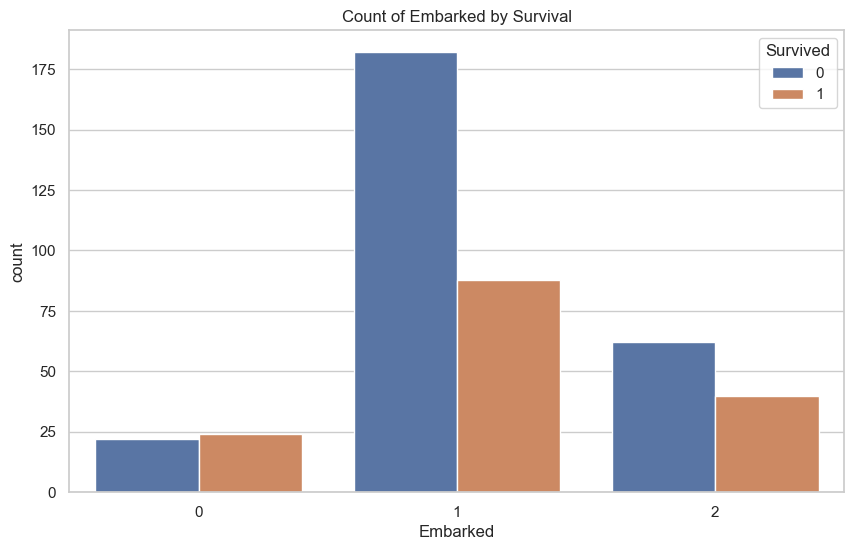

In [108]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f'Count of {col} by Survival')
    plt.show()


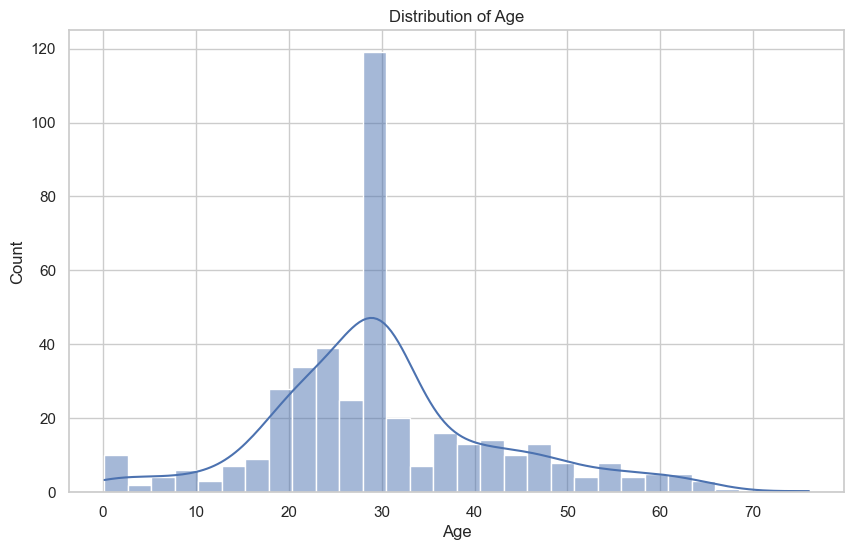

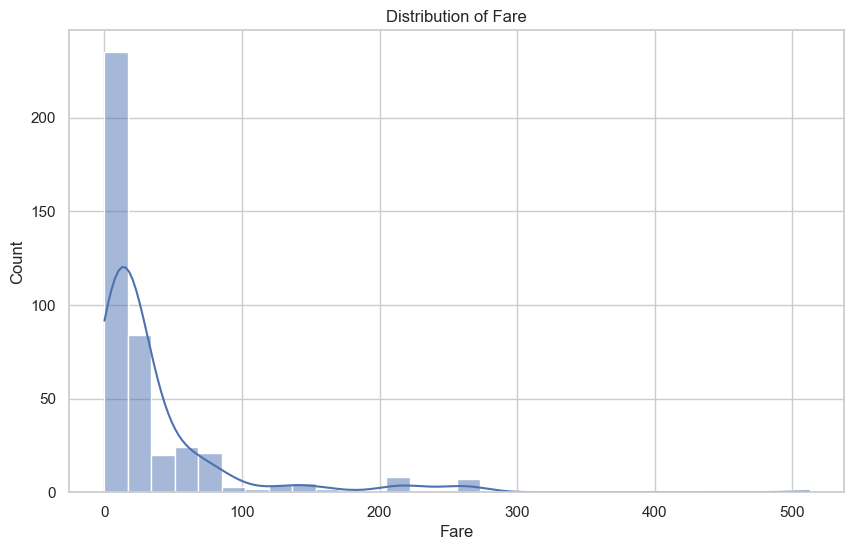

In [109]:

numerical_columns = ['Age', 'Fare']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()



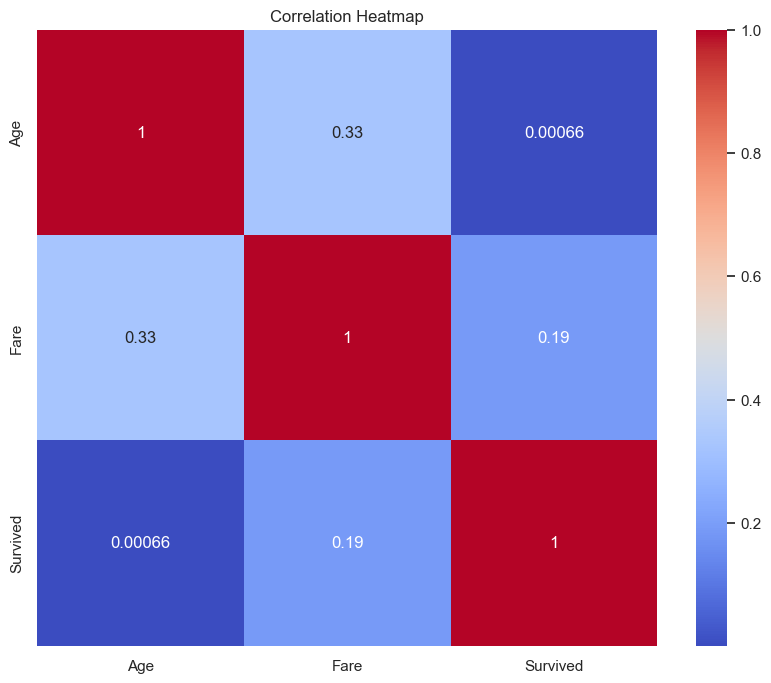

In [110]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns + ['Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



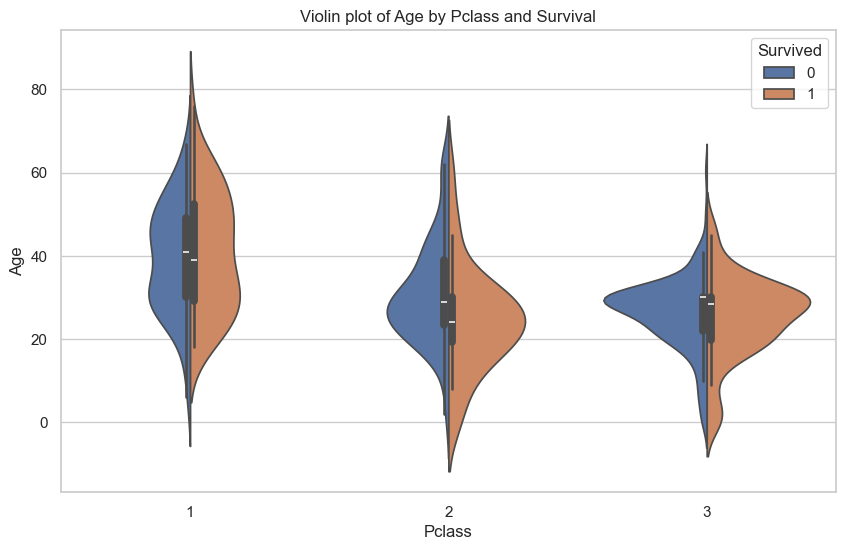

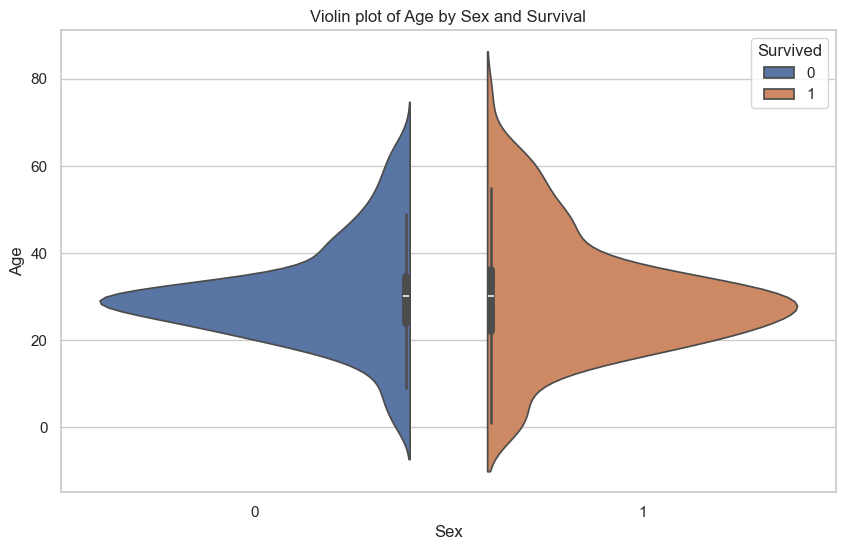

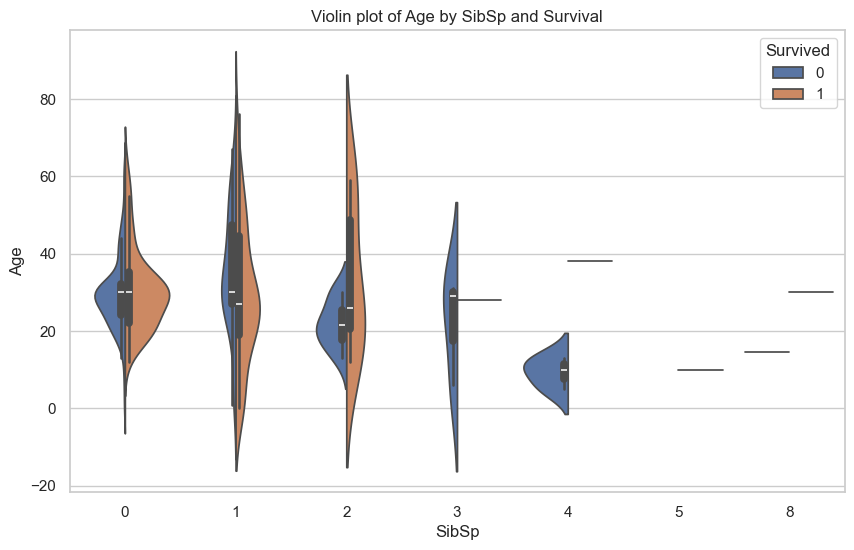

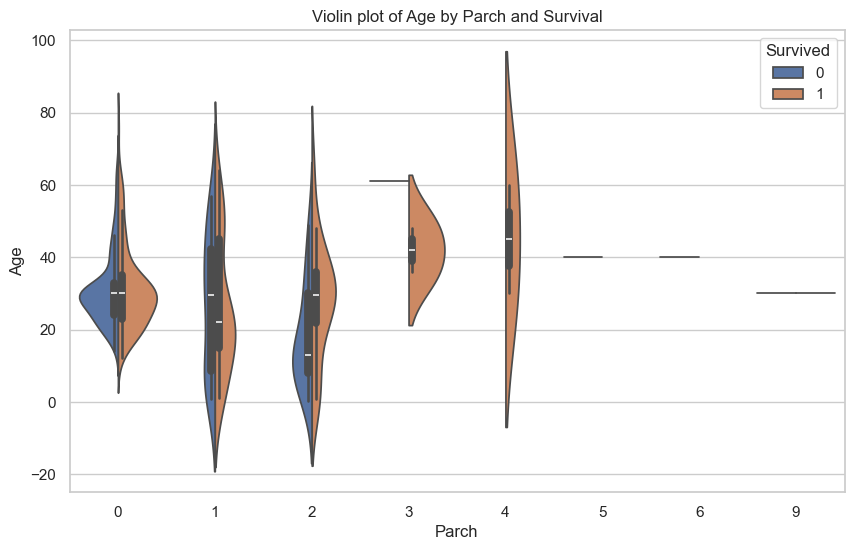

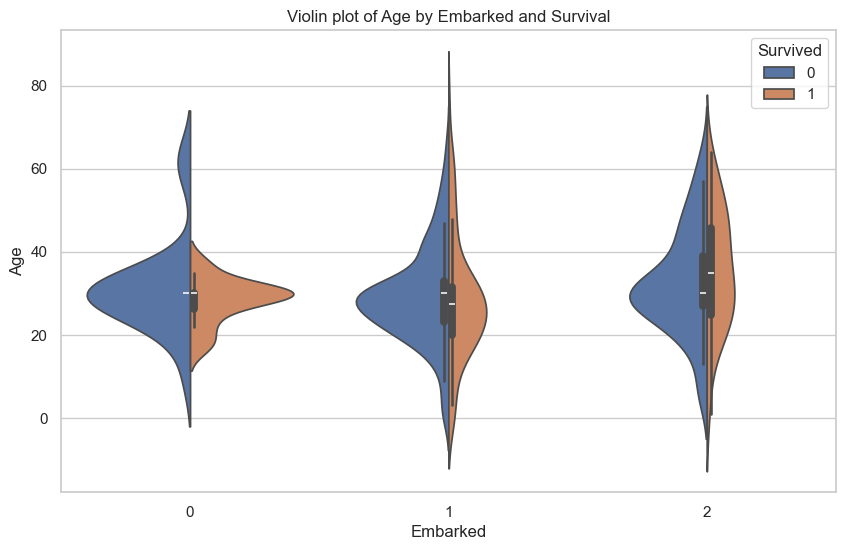

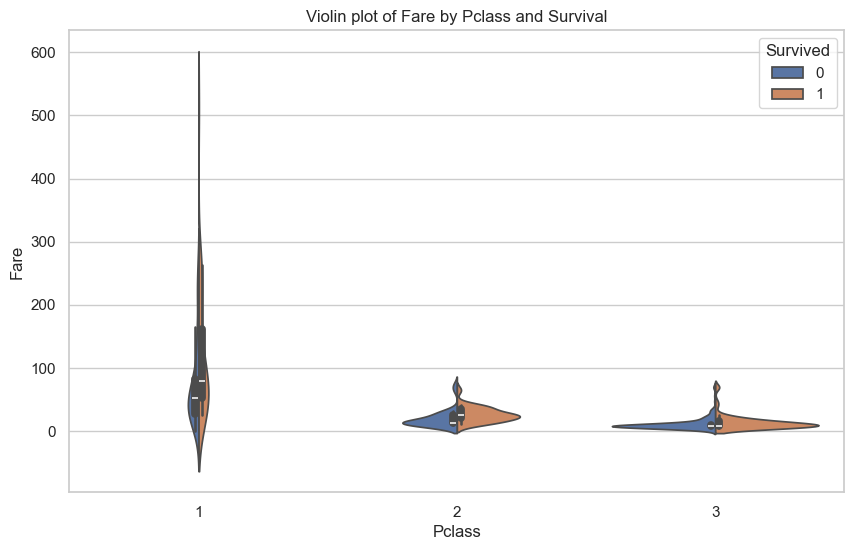

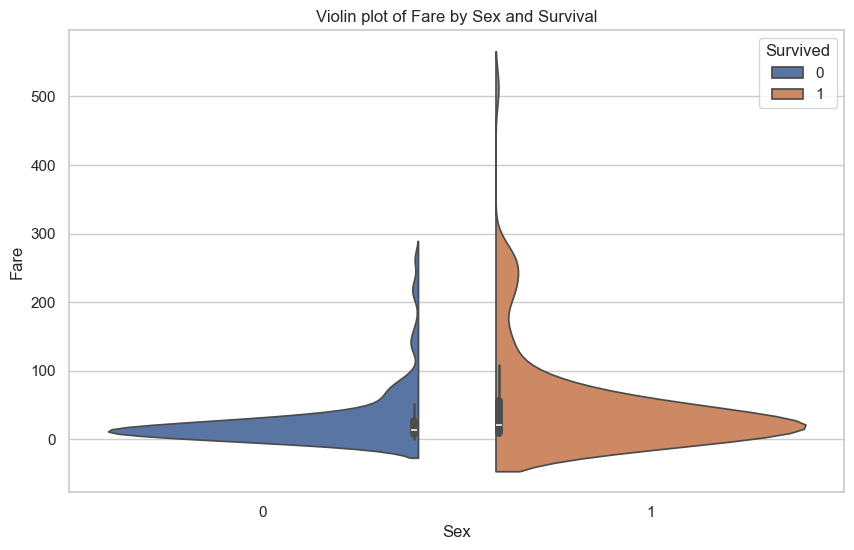

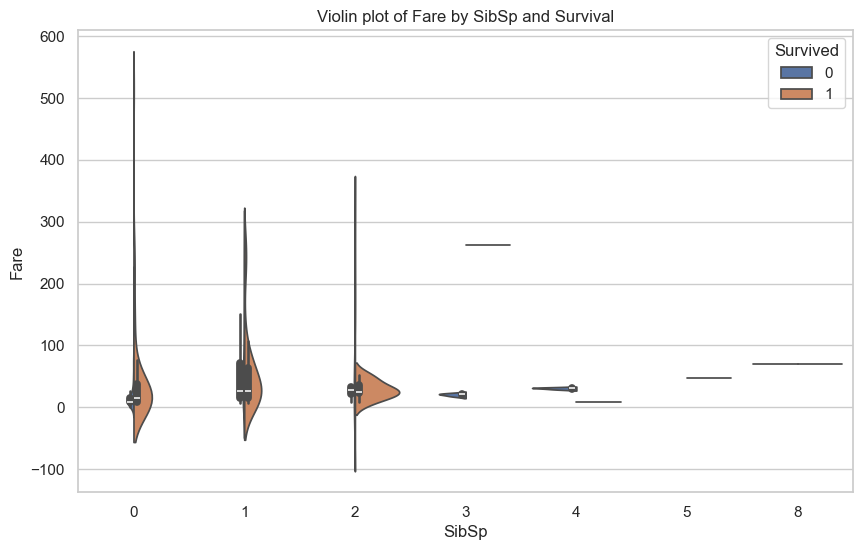

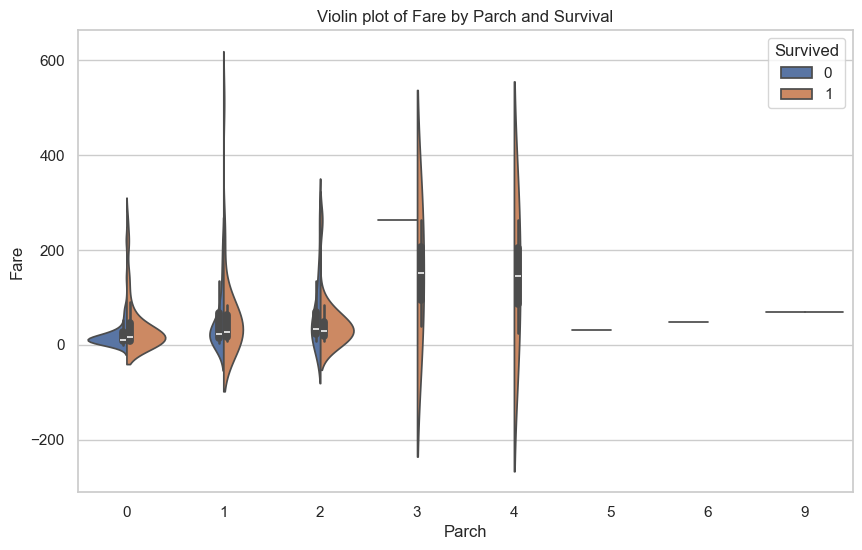

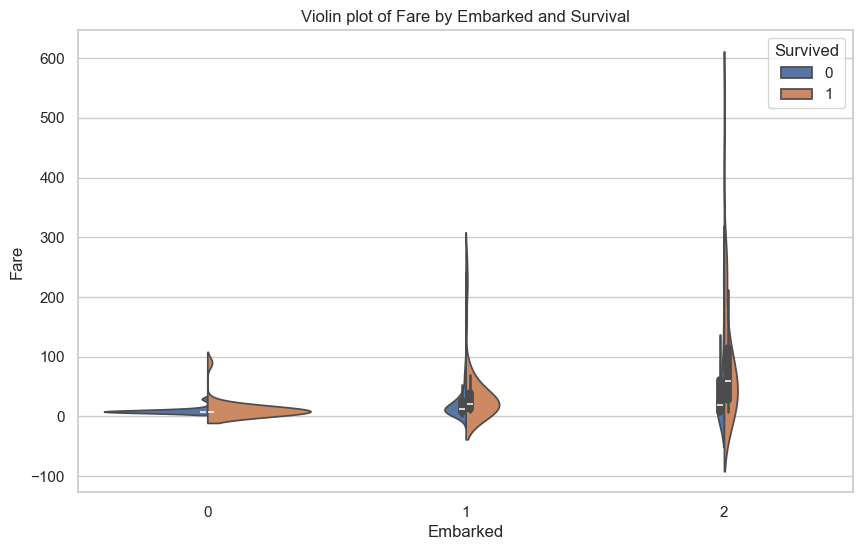

In [111]:
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=cat_col, y=num_col, hue='Survived', data=df, split=True)
        plt.title(f'Violin plot of {num_col} by {cat_col} and Survival')
        plt.show()



c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


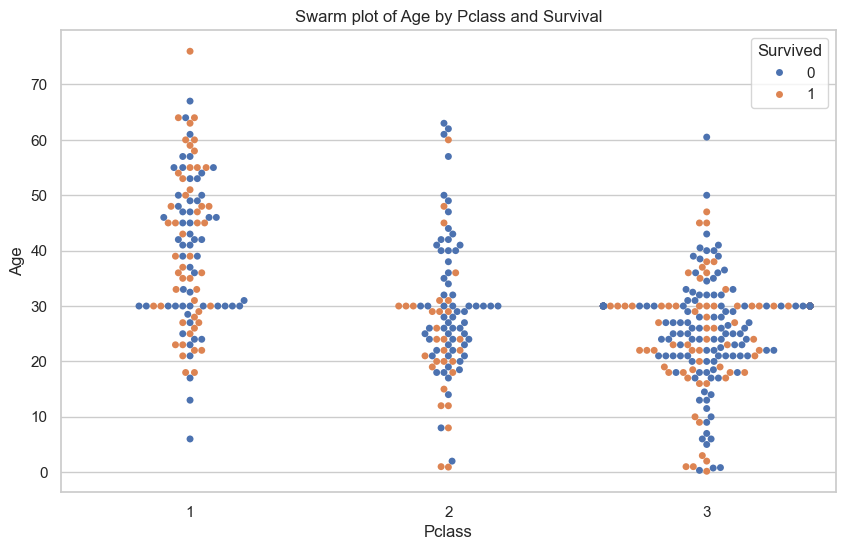

c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


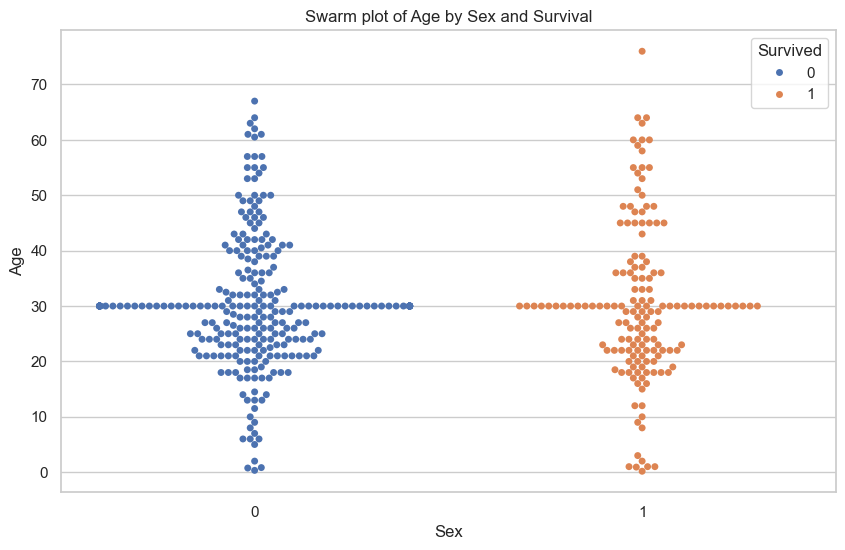

c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


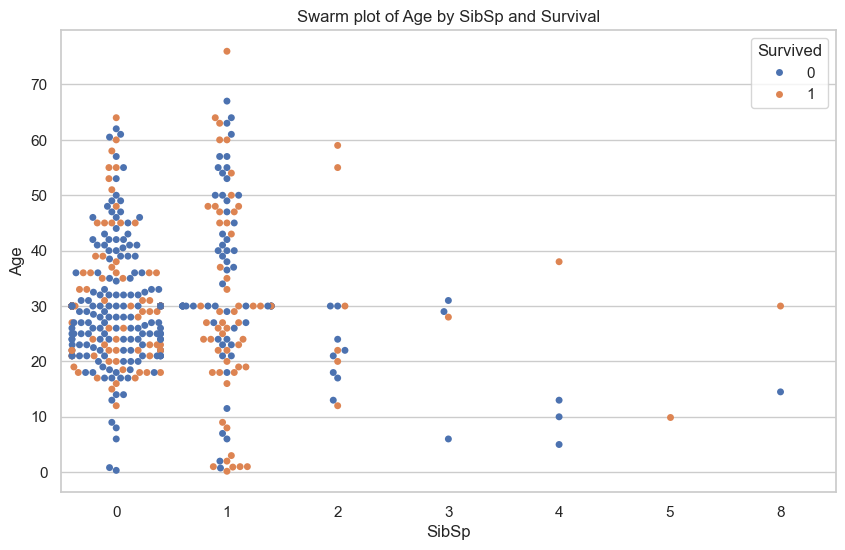

c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


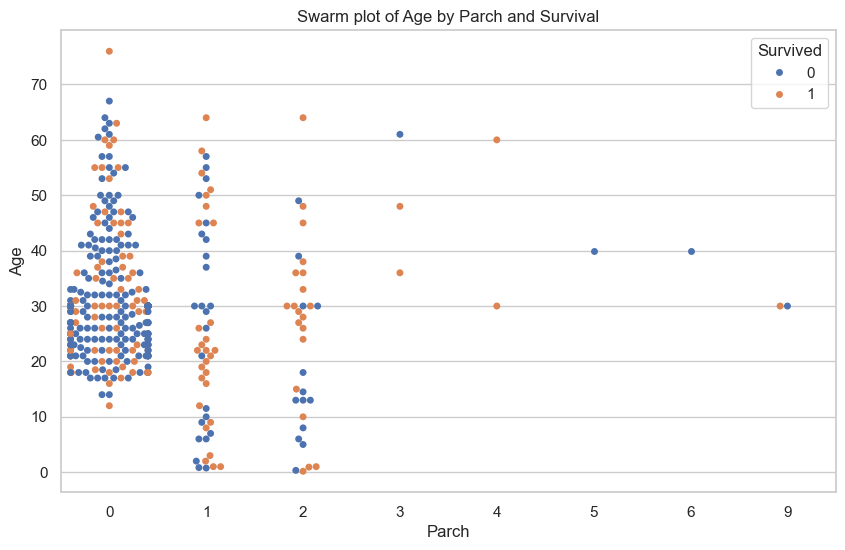

c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


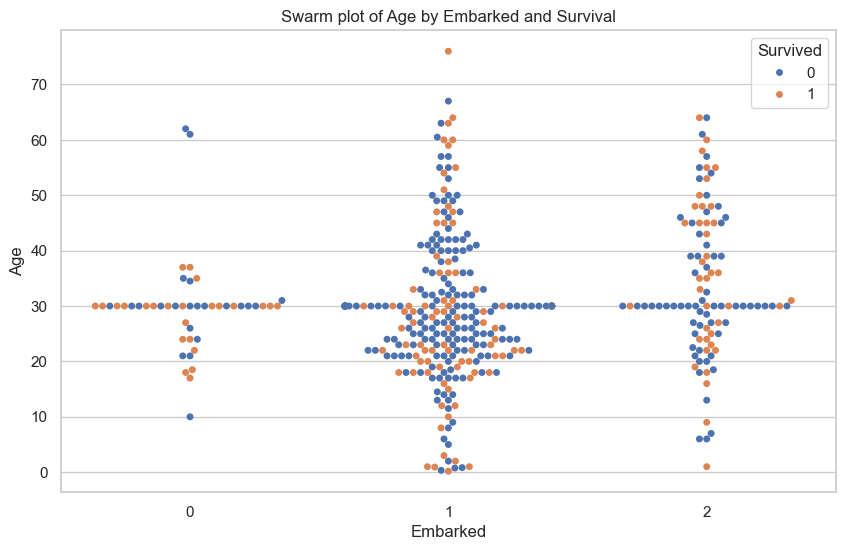

c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

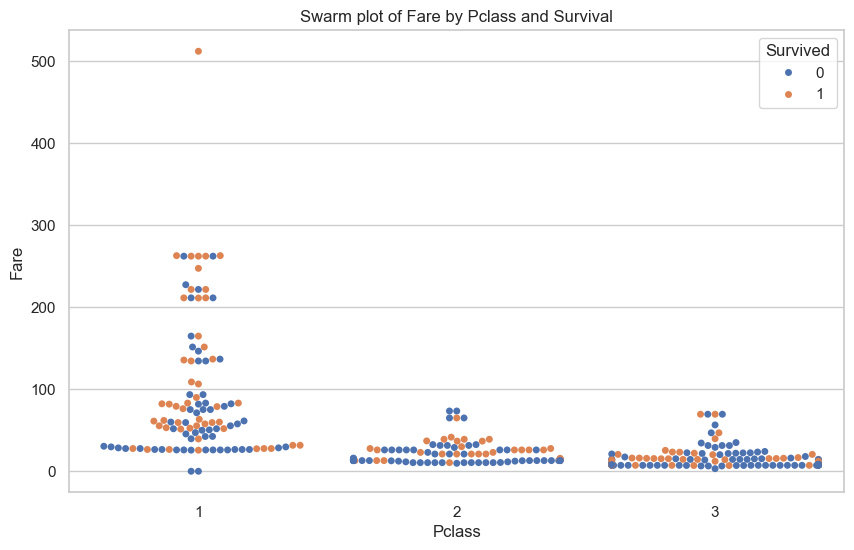

c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


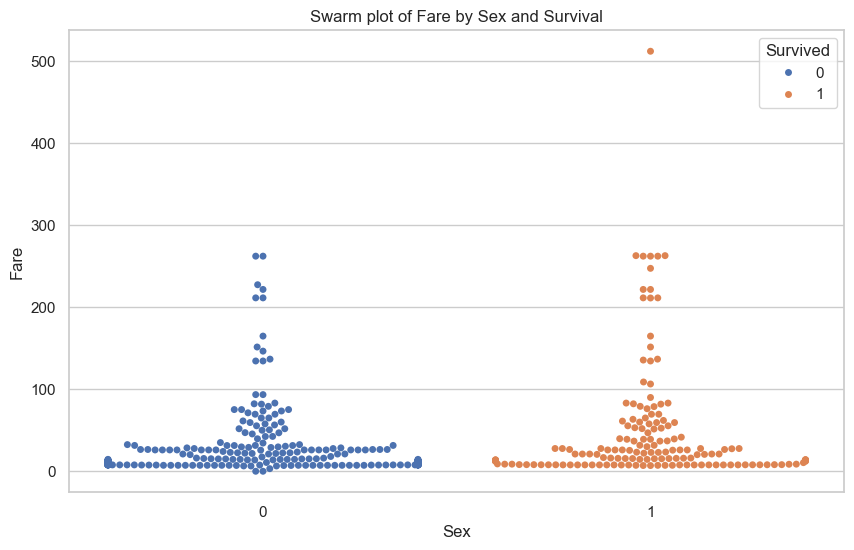

c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

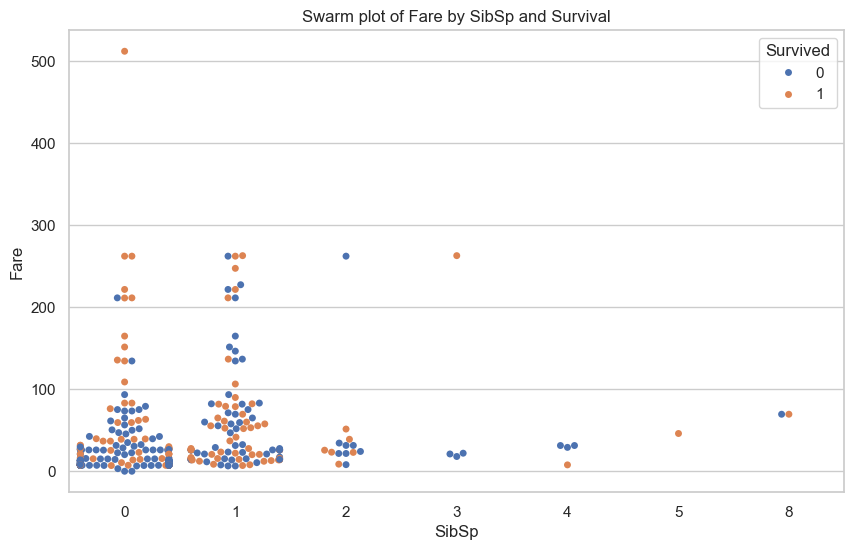

c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 70.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


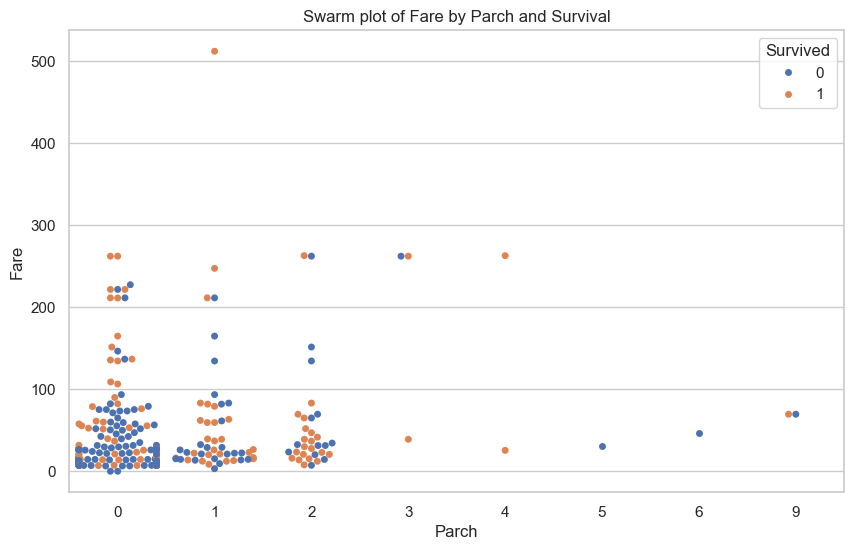

c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 47.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


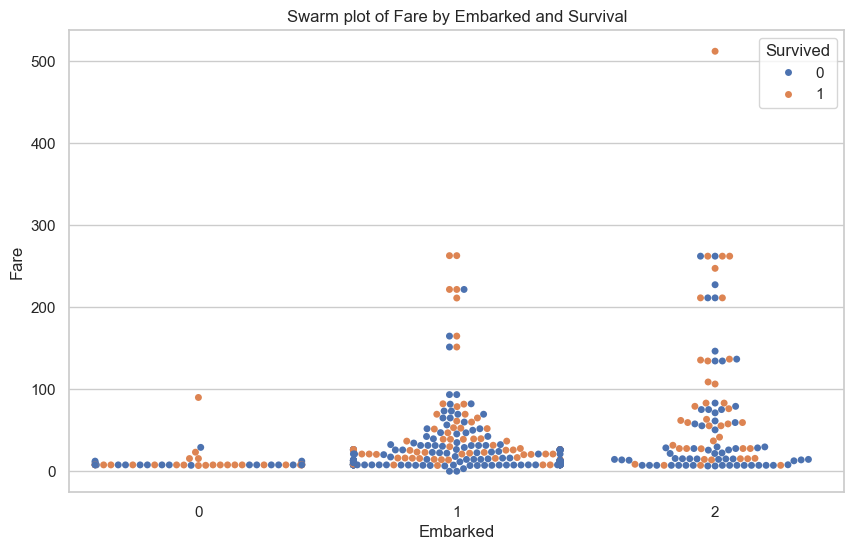

In [112]:
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.swarmplot(x=cat_col, y=num_col, hue='Survived', data=df)
        plt.title(f'Swarm plot of {num_col} by {cat_col} and Survival')
        plt.show()

In [113]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = ['Age', 'Fare']
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)

In [114]:
df.shape

(333, 8)